<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/1_2_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_(k_NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Метод k-ближайших соседей (k-NN)

### Введение

Метод k-ближайших соседей (k-NN) является одним из самых простых и интуитивно понятных алгоритмов в области машинного обучения. Он относится к семейству методов, основанных на обучении с учителем и используется как для классификации, так и для регрессии. Основная идея k-NN заключается в том, что объекты, находящиеся близко друг к другу в пространстве признаков, имеют схожие значения целевой переменной.

### Основные концепции k-NN

- **Локальность**: k-NN основывается на предположении, что объекты, находящиеся близко друг к другу, будут иметь схожие характеристики.
- **Непараметричность**: k-NN не требует предположений о распределении данных, что делает его универсальным для различных задач.

### Алгоритм k-NN

#### Шаги алгоритма

1. **Загрузка данных**:
   Обозначим обучающую выборку $D = \{(x_i, y_i)\}_{i=1}^{N}$, где $x_i \in \mathbb{R}^d$ — вектор признаков, а $y_i$ — метка класса или значение целевой переменной.

2. **Выбор метрики расстояния**:
   Для определения близости между объектами выбирается метрика расстояния. Наиболее распространенная метрика — евклидово расстояние:
   $$
   \rho(x_i, x_j) = \sqrt{\sum_{m=1}^{d} (x_{im} - x_{jm})^2}
   $$
   В зависимости от задачи могут быть использованы и другие метрики, такие как манхэттенское расстояние или метрики, основанные на косинусной схожести.

3. **Выбор числа соседей $k$**:
   Необходимо выбрать количество ближайших соседей $k$, которые будут использованы для принятия решения. Обычно выбирается нечетное число для избежания ничьих в классификации.

4. **Классификация или регрессия**:
   - **Классификация**: Для нового объекта $x$ метка класса $y$ определяется по большинству соседей:
     $$
     y = \arg\max_{y'} \sum_{i \in N_k(x)} I(y_i = y')
     $$
     где $N_k(x)$ — множество $k$ ближайших соседей объекта $x$, а $I$ — индикаторная функция, равная 1, если условие выполняется, и 0 в противном случае.

   - **Регрессия**: Для регрессии значение целевой переменной $\hat{y}$ определяется как среднее значение целевой переменной по $k$ ближайшим соседям:
     $$
     \hat{y} = \frac{1}{k} \sum_{i \in N_k(x)} y_i
     $$

### Пример k-NN

Рассмотрим пример, в котором мы используем k-NN для классификации.

#### Обучающая выборка:

- $(1, 2)$ - класс 0
- $(2, 3)$ - класс 1
- $(3, 4)$ - класс 1
- $(4, 5)$ - класс 0
- $(5, 6)$ - класс 1

Мы хотим классифицировать новый объект $(3.5, 4.5)$ при $k = 3$.

1. **Вычисление расстояний**:
   Вычисляем расстояния между новым объектом и всеми объектами обучающей выборки:
   $$
   \begin{align*}
   \rho((3.5, 4.5), (1, 2)) & = \sqrt{(3.5-1)^2 + (4.5-2)^2} \approx 3.16 \\
   \rho((3.5, 4.5), (2, 3)) & = \sqrt{(3.5-2)^2 + (4.5-3)^2} \approx 1.58 \\
   \rho((3.5, 4.5), (3, 4)) & = \sqrt{(3.5-3)^2 + (4.5-4)^2} \approx 1.12 \\
   \rho((3.5, 4.5), (4, 5)) & = \sqrt{(3.5-4)^2 + (4.5-5)^2} \approx 1.12 \\
   \rho((3.5, 4.5), (5, 6)) & = \sqrt{(3.5-5)^2 + (4.5-6)^2} \approx 2.12 \\
   \end{align*}
   $$

2. **Выбор ближайших соседей**:
   Соседи, отсортированные по расстоянию:
   - $(3, 4)$ - класс 1
   - $(4, 5)$ - класс 0
   - $(2, 3)$ - класс 1

   Три ближайших соседа: $(3, 4), (4, 5), (2, 3)$.

3. **Принятие решения**:
   Классы ближайших соседей: 1, 0, 1. Поскольку класс 1 встречается чаще, новый объект $(3.5, 4.5)$ классифицируется как класс 1.

### Градиенты в контексте k-NN

Хотя k-NN сам по себе не использует градиенты, понимание их применения может быть полезным, особенно если k-NN используется в комбинации с другими алгоритмами. Мы можем использовать градиенты для оценки потерь в контексте задач классификации и регрессии.

#### Градиенты для классификации

Для задачи классификации с использованием кросс-энтропийной потери:
$$
L(y, \hat{y}) = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$
где $y_i$ — истинная метка класса, а $\hat{y}_i$ — предсказанная вероятность.

Градиент потерь по предсказанным вероятностям:
$$
\frac{\partial L}{\partial \hat{y}_j} = -\frac{y_j}{\hat{y}_j}
$$

Это показывает, как изменяется функция потерь при изменении предсказанной вероятности для каждого класса.

#### Градиенты для регрессии

Для регрессии с использованием средней квадратичной ошибки (MSE):
$$
L(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

Градиент MSE по предсказанному значению:
$$
\frac{\partial L}{\partial \hat{y}} = \frac{2}{N} (\hat{y} - y)
$$

Этот градиент указывает на направление и величину изменения предсказанного значения для минимизации потерь.

### Применение k-NN в практике

1. **Выбор параметров**:
   Важно правильно выбрать параметры $k$ и метрику расстояния. Обычно для определения оптимального значения $k$ проводят кросс-валидацию.

2. **Нормализация данных**:
   При работе с различными признаками важно нормализовать данные, чтобы признаки с большим масштабом не доминировали в вычислении расстояний.

3. **Проблемы с масштабированием**:
   При больших выборках k-NN может быть вычислительно затратным. Для уменьшения времени вычисления можно использовать методы сокращения размерности, такие как PCA или t-SNE.

### Преимущества и недостатки k-NN

#### Преимущества:
- Простота и легкость в понимании и реализации.
- Отсутствие необходимости в обучении модели — подходит для задач, где требуется быстрая адаптация к изменениям в данных.

#### Недостатки:
- Высокая вычислительная сложность при больших объемах данных.
- Чувствительность к выбору метрики расстояния и параметра $k$.
- Плохая производительность при наличии шумовых данных и неравномерном распределении классов.

Рассмотрим подробный числовой пример применения метода k-ближайших соседей (k-NN) для задачи классификации. В этом примере мы используем маленький набор данных и проиллюстрируем все шаги с формулами.

### Пример

**Данные**: У нас есть обучающая выборка из 5 объектов с двумя признаками и метками классов.

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 1         | 2         | 0     |
| 2         | 3         | 1     |
| 3         | 4         | 1     |
| 4         | 5         | 0     |
| 5         | 6         | 1     |

**Новая точка для классификации**: $(3.5, 4.5)$

**Число ближайших соседей**: $k = 3$

### Шаг 1: Вычисление расстояний

Сначала мы вычислим расстояния между новой точкой $(3.5, 4.5)$ и всеми точками обучающей выборки с помощью **евклидова расстояния**:

$$
\rho(x_i, x_j) = \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2}
$$

#### Вычисляем расстояния:

1. **Расстояние до точки $(1, 2)$**:
   $$
   \rho((3.5, 4.5), (1, 2)) = \sqrt{(3.5 - 1)^2 + (4.5 - 2)^2} = \sqrt{(2.5)^2 + (2.5)^2} = \sqrt{6.25 + 6.25} = \sqrt{12.5} \approx 3.54
   $$

2. **Расстояние до точки $(2, 3)$**:
   $$
   \rho((3.5, 4.5), (2, 3)) = \sqrt{(3.5 - 2)^2 + (4.5 - 3)^2} = \sqrt{(1.5)^2 + (1.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.12
   $$

3. **Расстояние до точки $(3, 4)$**:
   $$
   \rho((3.5, 4.5), (3, 4)) = \sqrt{(3.5 - 3)^2 + (4.5 - 4)^2} = \sqrt{(0.5)^2 + (0.5)^2} = \sqrt{0.25 + 0.25} = \sqrt{0.5} \approx 0.71
   $$

4. **Расстояние до точки $(4, 5)$**:
   $$
   \rho((3.5, 4.5), (4, 5)) = \sqrt{(3.5 - 4)^2 + (4.5 - 5)^2} = \sqrt{(-0.5)^2 + (-0.5)^2} = \sqrt{0.25 + 0.25} = \sqrt{0.5} \approx 0.71
   $$

5. **Расстояние до точки $(5, 6)$**:
   $$
   \rho((3.5, 4.5), (5, 6)) = \sqrt{(3.5 - 5)^2 + (4.5 - 6)^2} = \sqrt{(-1.5)^2 + (-1.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.12
   $$

### Шаг 2: Сбор расстояний

Теперь мы соберем все расстояния и соответствующие классы:

| Объект        | Расстояние | Класс |
|---------------|------------|-------|
| $(1, 2)$  | 3.54       | 0     |
| $(2, 3)$  | 2.12       | 1     |
| $(3, 4)$  | 0.71       | 1     |
| $(4, 5)$  | 0.71       | 0     |
| $(5, 6)$  | 2.12       | 1     |

### Шаг 3: Определение ближайших соседей

Теперь мы сортируем расстояния и выбираем 3 ближайших соседа:

1. $(3, 4)$ — расстояние 0.71, класс 1
2. $(4, 5)$ — расстояние 0.71, класс 0
3. $(2, 3)$ — расстояние 2.12, класс 1

Ближайшие соседи: $(3, 4)$, $(4, 5)$, $(2, 3)$.

### Шаг 4: Принятие решения

Теперь мы смотрим на классы ближайших соседей:

- Классы ближайших соседей: 1 (раз, 1), 0 (раз), 1 (раз).
- Количество соседей по классам:
  - Класс 0: 1 сосед
  - Класс 1: 2 соседа

Поскольку класс 1 встречается чаще среди ближайших соседей, мы классифицируем новый объект $(3.5, 4.5)$ как класс 1.



Таким образом, новый объект $(3.5, 4.5)$ будет отнесен к классу 1 по методу k-ближайших соседей с $k = 3$. Этот пример иллюстрирует весь процесс k-NN, включая вычисление расстояний, выбор ближайших соседей и принятие решения на основе классов соседей.


### Заключение

Метод k-ближайших соседей является мощным инструментом для задач классификации и регрессии благодаря своей простоте и интуитивности. Однако, как и любой другой алгоритм, он имеет свои ограничения и требует аккуратного выбора параметров и предобработки данных. Понимание принципов работы k-NN и связанных с ним концепций, таких как градиенты, может значительно улучшить его применение в реальных задачах машинного обучения.






### Пример задачи клласификация

**Данные**: У нас есть обучающая выборка из 5 объектов с двумя признаками и метками классов.

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 1         | 2         | 0     |
| 2         | 3         | 1     |
| 3         | 4         | 1     |
| 4         | 5         | 0     |
| 5         | 6         | 1     |

**Новая точка для классификации**: $(3.5, 4.5)$

**Число ближайших соседей**: $k = 3$

### Шаг 1: Вычисление расстояний

Сначала мы вычислим расстояния между новой точкой $(3.5, 4.5)$ и всеми точками обучающей выборки с помощью **евклидова расстояния**:

$$
\rho(x_i, x_j) = \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2}
$$

#### Вычисляем расстояния:

1. **Расстояние до точки $(1, 2)$**:
   $$
   \rho((3.5, 4.5), (1, 2)) = \sqrt{(3.5 - 1)^2 + (4.5 - 2)^2} = \sqrt{(2.5)^2 + (2.5)^2} = \sqrt{6.25 + 6.25} = \sqrt{12.5} \approx 3.54
   $$

2. **Расстояние до точки $(2, 3)$**:
   $$
   \rho((3.5, 4.5), (2, 3)) = \sqrt{(3.5 - 2)^2 + (4.5 - 3)^2} = \sqrt{(1.5)^2 + (1.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.12
   $$

3. **Расстояние до точки $(3, 4)$**:
   $$
   \rho((3.5, 4.5), (3, 4)) = \sqrt{(3.5 - 3)^2 + (4.5 - 4)^2} = \sqrt{(0.5)^2 + (0.5)^2} = \sqrt{0.25 + 0.25} = \sqrt{0.5} \approx 0.71
   $$

4. **Расстояние до точки $(4, 5)$**:
   $$
   \rho((3.5, 4.5), (4, 5)) = \sqrt{(3.5 - 4)^2 + (4.5 - 5)^2} = \sqrt{(-0.5)^2 + (-0.5)^2} = \sqrt{0.25 + 0.25} = \sqrt{0.5} \approx 0.71
   $$

5. **Расстояние до точки $(5, 6)$**:
   $$
   \rho((3.5, 4.5), (5, 6)) = \sqrt{(3.5 - 5)^2 + (4.5 - 6)^2} = \sqrt{(-1.5)^2 + (-1.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.12
   $$

### Шаг 2: Сбор расстояний

Теперь мы соберем все расстояния и соответствующие классы:

| Объект        | Расстояние | Класс |
|---------------|------------|-------|
| $(1, 2)$  | 3.54       | 0     |
| $(2, 3)$  | 2.12       | 1     |
| $(3, 4)$  | 0.71       | 1     |
| $(4, 5)$  | 0.71       | 0     |
| $(5, 6)$  | 2.12       | 1     |

### Шаг 3: Определение ближайших соседей

Теперь мы сортируем расстояния и выбираем 3 ближайших соседа:

1. $(3, 4)$ — расстояние 0.71, класс 1
2. $(4, 5)$ — расстояние 0.71, класс 0
3. $(2, 3)$ — расстояние 2.12, класс 1

Ближайшие соседи: $(3, 4)$, $(4, 5)$, $(2, 3)$.

### Шаг 4: Принятие решения

Теперь мы смотрим на классы ближайших соседей:

- Классы ближайших соседей: 1 (раз, 1), 0 (раз), 1 (раз).
- Количество соседей по классам:
  - Класс 0: 1 сосед
  - Класс 1: 2 соседа

Поскольку класс 1 встречается чаще среди ближайших соседей, мы классифицируем новый объект $(3.5, 4.5)$ как класс 1.

### Заключение

Таким образом, новый объект $(3.5, 4.5)$ будет отнесен к классу 1 по методу k-ближайших соседей с $k = 3$. Этот пример иллюстрирует весь процесс k-NN, включая вычисление расстояний, выбор ближайших соседей и принятие решения на основе классов соседей.


Реализация на Питон

Предсказанный класс для [3.5 4.5]: 1


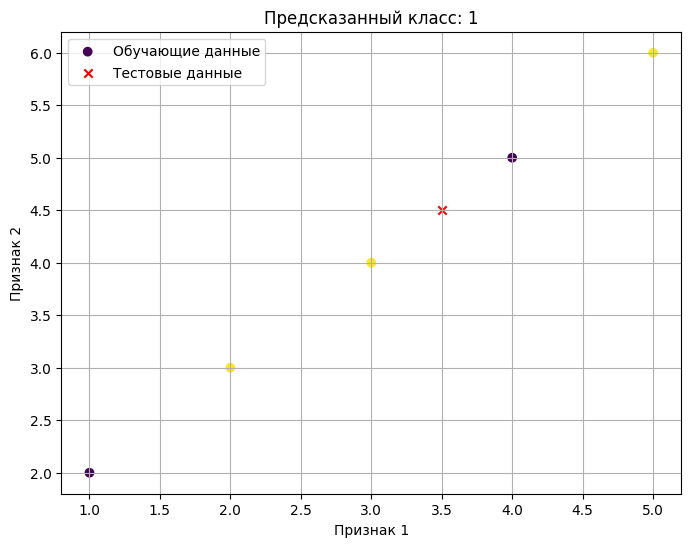

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def visualize(self, X_test, prediction):
        plt.figure(figsize=(8, 6))

        # Отображаем обучающие данные
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1], c=self.y_train, marker='o', label='Обучающие данные')

        # Отображаем тестовые данные
        plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker='x', label='Тестовые данные')

        # Отображаем предсказание
        plt.title(f'Предсказанный класс: {prediction[0]}')
        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')
        plt.legend()
        plt.grid()
        plt.show()

# Пример использования
if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    y_train = np.array([0, 1, 1, 0, 1])
    X_test = np.array([[3.5, 4.5]])

    model = KNN(k=3)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f"Предсказанный класс для {X_test[0]}: {prediction[0]}")

    # Визуализация
    model.visualize(X_test, prediction)

Чтобы использовать готовые библиотеки для визуализации в нашем классе KNN, мы можем воспользоваться библиотеками matplotlib или seaborn. Вот пример, как можно добавить визуализацию с использованием matplotlib:

Предсказанный класс для [3.5 4.5]: 1


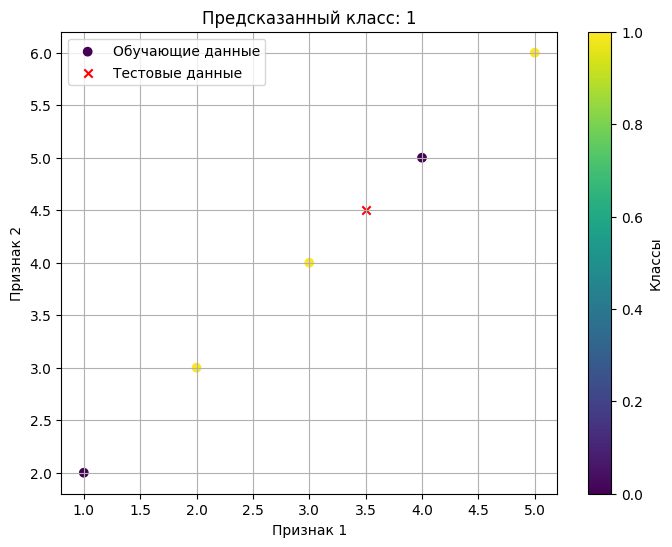

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Генерация обучающих данных
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y_train = np.array([0, 1, 1, 0, 1])  # Метки классов

# Создание и обучение модели KNN
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Новый объект для классификации
X_test = np.array([[3.5, 4.5]])
prediction = model.predict(X_test)

print(f"Предсказанный класс для {X_test[0]}: {prediction[0]}")

# Визуализация
plt.figure(figsize=(8, 6))

# Отображаем обучающие данные
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Обучающие данные')

# Отображаем тестовые данные
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker='x', label='Тестовые данные')

# Отображаем предсказание
plt.title(f'Предсказанный класс: {prediction[0]}')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.colorbar(scatter, label='Классы')
plt.grid()
plt.show()

Теперь давайте рассмотрим пример задачи регрессии с использованием метода k-ближайших соседей (k-NN). Мы создадим обучающую выборку, которая содержит числовые значения, и будем предсказывать значение непрерывной целевой переменной для нового объекта.

### Пример задачи регрессии

**Данные**: У нас есть обучающая выборка из 5 объектов с двумя признаками и значением целевой переменной (регрессии).

| Признак 1 | Признак 2 | Значение |
|-----------|-----------|----------|
| 1         | 2         | 10       |
| 2         | 3         | 15       |
| 3         | 4         | 20       |
| 4         | 5         | 25       |
| 5         | 6         | 30       |

**Новая точка для регрессии**: $(3.5, 4.5)$

**Число ближайших соседей**: $k = 3$

### Шаг 1: Вычисление расстояний

Сначала мы вычислим расстояния между новой точкой $(3.5, 4.5)$ и всеми точками обучающей выборки с помощью **евклидова расстояния**:

$$
\rho(x_i, x_j) = \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2}
$$

#### Вычисляем расстояния:

1. **Расстояние до точки $(1, 2)$**:
   $$
   \rho((3.5, 4.5), (1, 2)) = \sqrt{(3.5 - 1)^2 + (4.5 - 2)^2} = \sqrt{(2.5)^2 + (2.5)^2} = \sqrt{6.25 + 6.25} = \sqrt{12.5} \approx 3.54
   $$

2. **Расстояние до точки $(2, 3)$**:
   $$
   \rho((3.5, 4.5), (2, 3)) = \sqrt{(3.5 - 2)^2 + (4.5 - 3)^2} = \sqrt{(1.5)^2 + (1.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.12
   $$

3. **Расстояние до точки $(3, 4)$**:
   $$
   \rho((3.5, 4.5), (3, 4)) = \sqrt{(3.5 - 3)^2 + (4.5 - 4)^2} = \sqrt{(0.5)^2 + (0.5)^2} = \sqrt{0.25 + 0.25} = \sqrt{0.5} \approx 0.71
   $$

4. **Расстояние до точки $(4, 5)$**:
   $$
   \rho((3.5, 4.5), (4, 5)) = \sqrt{(3.5 - 4)^2 + (4.5 - 5)^2} = \sqrt{(-0.5)^2 + (-0.5)^2} = \sqrt{0.25 + 0.25} = \sqrt{0.5} \approx 0.71
   $$

5. **Расстояние до точки $(5, 6)$**:
   $$
   \rho((3.5, 4.5), (5, 6)) = \sqrt{(3.5 - 5)^2 + (4.5 - 6)^2} = \sqrt{(-1.5)^2 + (-1.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.12
   $$

### Шаг 2: Сбор расстояний

Теперь мы соберем все расстояния и соответствующие значения целевой переменной:

| Объект        | Расстояние | Значение |
|---------------|------------|----------|
| $(1, 2)$  | 3.54       | 10       |
| $(2, 3)$  | 2.12       | 15       |
| $(3, 4)$  | 0.71       | 20       |
| $(4, 5)$  | 0.71       | 25       |
| $(5, 6)$  | 2.12       | 30       |

### Шаг 3: Определение ближайших соседей

Теперь мы сортируем расстояния и выбираем 3 ближайших соседа:

1. $(3, 4)$ — расстояние 0.71, значение 20
2. $(4, 5)$ — расстояние 0.71, значение 25
3. $(2, 3)$ — расстояние 2.12, значение 15

Ближайшие соседи: $(3, 4)$, $(4, 5)$, $(2, 3)$.

### Шаг 4: Принятие решения

Теперь мы смотрим на значения целевой переменной ближайших соседей:

- Значения ближайших соседей: 20, 25, 15.

Чтобы получить предсказание для новой точки, мы вычислим **среднее значение** ближайших соседей:

$$
\text{Предсказание} = \frac{20 + 25 + 15}{3} = \frac{60}{3} = 20
$$

### Заключение

Таким образом, для нового объекта $(3.5, 4.5)$ мы предсказываем значение целевой переменной равным 20 по методу k-ближайших соседей с $k = 3$. Этот пример иллюстрирует весь процесс k-NN для регрессии, включая вычисление расстояний, выбор ближайших соседей и принятие решения на основе значений целевой переменной соседей.


Предсказанное значение для [3.5 4.5]: 20.0


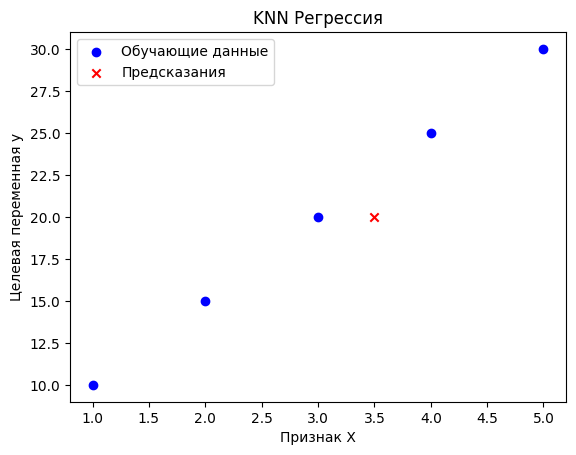

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_values = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_values)

    def visualize(self, X_test, predictions):
        plt.scatter(self.X_train[:, 0], self.y_train, color='blue', label='Обучающие данные')
        plt.scatter(X_test[:, 0], predictions, color='red', label='Предсказания', marker='x')
        plt.title('KNN Регрессия')
        plt.xlabel('Признак X')
        plt.ylabel('Целевая переменная y')
        plt.legend()
        plt.show()

# Пример использования
if __name__ == "__main__":
    X_train = np.array([[1, 2],
                        [2, 3],
                        [3, 4],
                        [4, 5],
                        [5, 6]])
    y_train = np.array([10, 15, 20, 25, 30])
    X_test = np.array([[3.5, 4.5]])

    model = KNNRegressor(k=3)
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    print(f"Предсказанное значение для {X_test[0]}: {prediction[0]}")

    # Визуализация
    model.visualize(X_test, prediction)

Чтобы использовать KNN-регрессию без создания собственного класса, мы можем воспользоваться библиотекой scikit-learn, которая предоставляет готовые реализации. Вот пример использования KNN-регрессора с визуализацией:

Предсказанное значение для [3.5 4.5]: 20.0


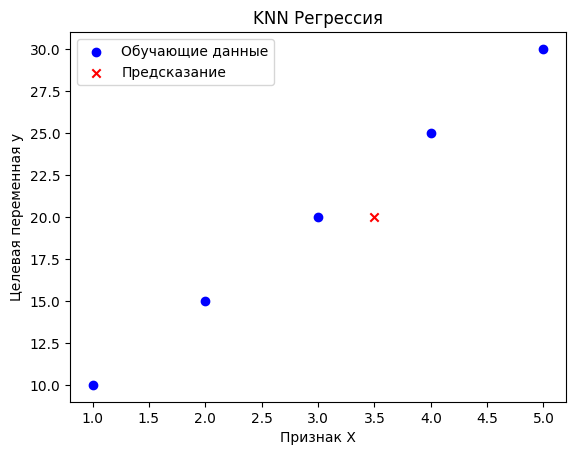

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Генерация обучающих данных
X_train = np.array([[1, 2],
                    [2, 3],
                    [3, 4],
                    [4, 5],
                    [5, 6]])
y_train = np.array([10, 15, 20, 25, 30])

# Создание KNN-регрессора
k = 3
model = KNeighborsRegressor(n_neighbors=k)

# Обучение модели
model.fit(X_train, y_train)

# Новый объект для предсказания
X_test = np.array([[3.5, 4.5]])
prediction = model.predict(X_test)
print(f"Предсказанное значение для {X_test[0]}: {prediction[0]}")

# Визуализация
plt.scatter(X_train[:, 0], y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test[:, 0], prediction, color='red', label='Предсказание', marker='x')
plt.title('KNN Регрессия')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.legend()
plt.show()

### Вопросы для самопроверки:
1. Что представляет собой метод k-ближайших соседей (k-NN)?
2. Какие задачи решаются с помощью k-NN: классификация, регрессия или обе?
3. Какую роль играет расстояние в методе k-NN?
4. Какие метрики расстояния наиболее часто используются в k-NN?
5. Как вычисляется евклидово расстояние между двумя объектами в k-NN?
6. Как влияет выбор значения k на работу алгоритма?
7. Почему чаще всего для k выбирается нечетное число?
8. Как происходит классификация нового объекта в k-NN?
9. Как k-NN используется для задач регрессии?
10. В чем заключаются основные преимущества метода k-NN?
11. Какие недостатки и ограничения существуют у k-NN?
12. Почему важно нормализовать данные при использовании k-NN?
13. Какие способы уменьшения вычислительных затрат при больших объемах данных можно использовать в k-NN?
14. Что такое кросс-валидация, и как она помогает в выборе параметра k?
15. Как метод k-NN может быть использован в сочетании с другими алгоритмами?

### Задачи для самостоятельной работы:

1. Реализуйте алгоритм k-NN с использованием евклидовой метрики для набора данных с двумя признаками.
2. Реализуйте k-NN с использованием манхэттенской метрики расстояния.
3. Проведите эксперимент с разными значениями k на одном наборе данных и сравните результаты.
4. Напишите программу, которая классифицирует данные на основе косинусного расстояния.
5. Реализуйте k-NN для задачи регрессии и протестируйте на искусственном наборе данных.
6. Примените k-NN для задачи классификации на датасете Iris. Определите оптимальное значение k.
7. Реализуйте k-NN с нормализацией признаков и без нее, сравните результаты на наборе данных Wine.
8. Используйте PCA для сокращения размерности данных и примените k-NN.
9. Попробуйте различные метрики расстояния на одном наборе данных и сравните результаты классификации.
10. Реализуйте k-NN для многоклассовой классификации на основе набора данных CIFAR-10.
11. Сравните производительность k-NN и логистической регрессии на одном наборе данных.
12. Постройте график зависимости качества классификации от числа соседей k.
13. Используя k-NN, решите задачу классификации рукописных цифр (MNIST).
14. Примените метод t-SNE для визуализации данных перед использованием k-NN.
15. Напишите программу для подсчета количества правильных и неправильных классификаций в k-NN.
16. Реализуйте алгоритм поиска ближайших соседей с использованием KD-деревьев для ускорения k-NN.
17. Разработайте программу для оценки времени работы k-NN при различных объемах данных.
18. Используйте метод кросс-валидации для оптимизации параметров k-NN.
19. Исследуйте влияние добавления шумовых данных на точность k-NN.
20. Реализуйте k-NN с весовыми коэффициентами для соседей, где ближние соседи имеют больший вес.
21. Проведите эксперимент с разными объемами обучающей выборки и оцените производительность k-NN.
22. Примените k-NN для задачи прогнозирования цен на жилье с помощью регрессии.
23. Реализуйте систему рекомендаций товаров на основе k-NN.
24. Напишите программу для визуализации процесса классификации нового объекта в пространстве признаков.
25. Используйте библиотеку scikit-learn для построения модели k-NN и сравните с вашей реализацией.
26. Примените k-NN к временным рядам и оцените результат.
27. Реализуйте k-NN с использованием многопроцессорной обработки для ускорения вычислений.
28. Примените метод отбора признаков для улучшения работы k-NN.
29. Напишите программу, которая находит оптимальные метрику и количество соседей для k-NN.
30. Разработайте и примените метод для автоматической настройки гиперпараметров k-NN на основе поиска по сетке (Grid Search).